# Linear Regression

In [47]:
#import all important libraries 
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model
import statsmodels.api as sm

In [48]:
#load data from local
file_name =  r'C:\Users\redadg\Desktop\Old Desktop\MS\Programming for data science\Assignmnets\Module 5\MCIS540-M5-Data.xlsx'
# sheet name or sheet number or list of sheet numbers and names
sheet = r'mcis540_data' 

#read the data from the excel
df = pd.read_excel(io=file_name, sheet_name=sheet)
print(df.head())  

             Industry  Insider_Ownership  Debt_Ratio  Dividend_Payout
0              Mining                8.2        14.2             10.4
1   Food and beverage               18.4        20.8             14.3
2           Furniture               11.8        18.6             12.1
3          Publishing               28.0        18.5             11.8
4  Petroleum refining                7.4        28.2             10.6


In [49]:
#To see statistical details of the dataset, we can use describe():
df.describe()  

,Insider_Ownership,Debt_Ratio,Dividend_Payout
count,11.000000,11.000000,11.000000
mean,14.981818,24.345455,10.545455
std,5.866655,9.559745,2.867879
min,7.400000,14.200000,4.100000
25%,10.900000,18.550000,9.700000
50%,15.400000,21.700000,11.300000
75%,18.250000,26.450000,12.350000
max,28.000000,46.700000,14.300000


# Checking for Linearity 

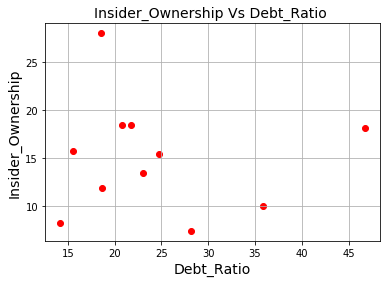

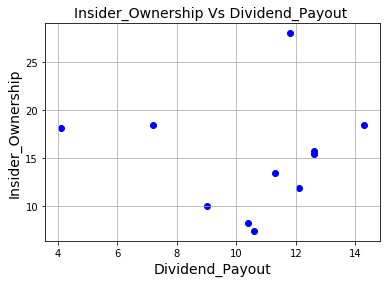

In [50]:
#checking if a linear relationship exists between Insider_Ownership and Debt_Ratio
plt.scatter(df['Debt_Ratio'], df['Insider_Ownership'], color='red')
plt.title('Insider_Ownership Vs Debt_Ratio ', fontsize=14)
plt.xlabel('Debt_Ratio', fontsize=14)
plt.ylabel('Insider_Ownership', fontsize=14)
plt.grid(True)
plt.show()

#checking if a linear relationship exists between Insider_Ownership and Dividend_Payout
plt.scatter(df['Dividend_Payout'], df['Insider_Ownership'], color='blue')
plt.title('Insider_Ownership Vs Dividend_Payout ', fontsize=14)
plt.xlabel('Dividend_Payout', fontsize=14)
plt.ylabel('Insider_Ownership', fontsize=14)
plt.grid(True)
plt.show()


# Statsmodels

In [51]:
#let us define a function that estimate a  multiple regression 

# we have 2 variables for multiple regression, the debit and dividend payout
X = df[['Debt_Ratio','Dividend_Payout']]
#insider ownership will be a y value of the  multiple regression. 
Y  = df['Insider_Ownership']

def reg_sm(Y,X):
    # with statsmodels
    # adding a constant
    X = sm.add_constant(X) 
    #from the OLD anf fit method estimate of covariance matrix, residuals and an estimate of scale
    model = sm.OLS(endog=Y, exog = X).fit()
    # predict usu=ing the model
    predictions = model.predict(X)
    results = model.summary()
    return results

#call the method and pass a multiple variables to print out mutiple regression
print(reg_sm(Y,X))


                            OLS Regression Results                            
Dep. Variable:      Insider_Ownership   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.244
Method:                 Least Squares   F-statistic:                   0.01845
Date:                Sat, 13 Apr 2019   Prob (F-statistic):              0.982
Time:                        19:12:35   Log-Likelihood:                -34.521
No. Observations:                  11   AIC:                             75.04
Df Residuals:                       8   BIC:                             76.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              17.6772     17.560     

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


# Scikit-learn

In [52]:
#let's find the Coefficients and Intercept using Scikit-learn
def linear_model():
    #import linear regression
    from sklearn import datasets, linear_model
    
    regr = linear_model.LinearRegression()
    #feed the linear regression with the train data to obtain a model.
    regr.fit(X, Y)
    #printout the Intercept using the linear_model.LinearRegression
    print('Intercept: \n', regr.intercept_)
    #printout the Coefficients using the linear_model.LinearRegression
    print('Coefficients: \n', regr.coef_)
    # prediction with sklearn, let us get the first value of Insider_Ownershi and Debt_Ratio 
    #from the datasetto predict(which is 11)
    New_Insider_Ownership = 11
    New_Debt_Ratio = 11
    #print out the prediction of Insider_Ownership
    results = 'Predicted Insider_Ownership: \n', regr.predict([[New_Insider_Ownership ,New_Debt_Ratio]])
    return results

#call the function and print out Coefficients and Intercept
linear_model()    



Intercept: 
 17.67724122701509
Coefficients: 
 [-0.05944442 -0.11836583]


('Predicted Insider_Ownership: \n', array([15.72132838]))